In [1]:
!pip install fast-bert

     |████████████████████████████████| 101 kB 996 kB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 4.0 MB 3.4 MB/s 
     |████████████████████████████████| 3.0 MB 64.0 MB/s 
     |████████████████████████████████| 5.2 MB 48.6 MB/s 
     |████████████████████████████████| 212 kB 61.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 6.6 MB 56.7 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 40 kB 4.3 MB/s 
     |████████████████████████████████| 15.7 MB 47.4 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22245 sha256=01f252f26a802b258d921128cf935a4fe37c418f040d5db7c5a43f

In [2]:
import os
import json
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [3]:
df_train = pd.read_csv("../input/goemotions/data/train.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_dev = pd.read_csv("../input/goemotions/data/dev.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])

In [4]:
df_train['List of classes'] = df_train['Class'].apply(lambda x: x.split(','))
df_train['Len of classes'] = df_train['List of classes'].apply(lambda x: len(x))
df_dev['List of classes'] = df_dev['Class'].apply(lambda x: x.split(','))
df_dev['Len of classes'] = df_dev['List of classes'].apply(lambda x: len(x))

In [5]:
with open('../input/goemotions/data/ekman_mapping.json') as file:
    ekman_mapping = json.load(file)

In [6]:
ekman_mapping

{'anger': ['anger', 'annoyance', 'disapproval'],
 'disgust': ['disgust'],
 'fear': ['fear', 'nervousness'],
 'joy': ['joy',
  'amusement',
  'approval',
  'excitement',
  'gratitude',
  'love',
  'optimism',
  'relief',
  'pride',
  'admiration',
  'desire',
  'caring'],
 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'],
 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}

In [7]:
emotion_file = open("../input/goemotions/data/emotions.txt", "r")
emotion_list = emotion_file.read()
emotion_list = emotion_list.split("\n")
print(emotion_list)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [8]:
def idx2class(idx_list):
    arr = []
    for i in idx_list:
        arr.append(emotion_list[int(i)])
    return arr

In [9]:
df_train['Emotions'] = df_train['List of classes'].apply(idx2class)
df_dev['Emotions'] = df_dev['List of classes'].apply(idx2class)

In [10]:
def EmotionMapping(emotion_list):
    map_list = []
    
    for i in emotion_list:
        if i in ekman_mapping['anger']:
            map_list.append('anger')
        if i in ekman_mapping['disgust']:
            map_list.append('disgust')
        if i in ekman_mapping['fear']:
            map_list.append('fear')
        if i in ekman_mapping['joy']:
            map_list.append('joy')
        if i in ekman_mapping['sadness']:
            map_list.append('sadness')
        if i in ekman_mapping['surprise']:
            map_list.append('surprise')
        if i == 'neutral':
            map_list.append('neutral')
            
    return map_list

In [11]:
df_train['Mapped Emotions'] = df_train['Emotions'].apply(EmotionMapping)
df_dev['Mapped Emotions'] = df_dev['Emotions'].apply(EmotionMapping)

In [12]:
df_train['anger'] = np.zeros((len(df_train),1))
df_train['disgust'] = np.zeros((len(df_train),1))
df_train['fear'] = np.zeros((len(df_train),1))
df_train['joy'] = np.zeros((len(df_train),1))
df_train['sadness'] = np.zeros((len(df_train),1))
df_train['surprise'] = np.zeros((len(df_train),1))
df_train['neutral'] = np.zeros((len(df_train),1))

df_dev['anger'] = np.zeros((len(df_dev),1))
df_dev['disgust'] = np.zeros((len(df_dev),1))
df_dev['fear'] = np.zeros((len(df_dev),1))
df_dev['joy'] = np.zeros((len(df_dev),1))
df_dev['sadness'] = np.zeros((len(df_dev),1))
df_dev['surprise'] = np.zeros((len(df_dev),1))
df_dev['neutral'] = np.zeros((len(df_dev),1))

In [13]:
for i in ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise','neutral']:
    df_train[i] = df_train['Mapped Emotions'].apply(lambda x: 1 if i in x else 0)
    df_dev[i] = df_dev['Mapped Emotions'].apply(lambda x: 1 if i in x else 0)

In [14]:
df_train.head()

,Text,Class,ID,List of classes,Len of classes,Emotions,Mapped Emotions,anger,disgust,fear,joy,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,27,eebbqej,[27],1,[neutral],[neutral],0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,[27],1,[neutral],[neutral],0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,[2],1,[anger],[anger],1,0,0,0,0,0,0
3,To make her feel threatened,14,ed7ypvh,[14],1,[fear],[fear],0,0,1,0,0,0,0
4,Dirty Southern Wankers,3,ed0bdzj,[3],1,[annoyance],[anger],1,0,0,0,0,0,0


In [15]:
df_dev.head()

,Text,Class,ID,List of classes,Len of classes,Emotions,Mapped Emotions,anger,disgust,fear,joy,sadness,surprise,neutral
0,Is this in New Orleans?? I really feel like th...,27,edgurhb,[27],1,[neutral],[neutral],0,0,0,0,0,0,1
1,"You know the answer man, you are programmed to...","4,27",ee84bjg,"[4, 27]",2,"[approval, neutral]","[joy, neutral]",0,0,0,1,0,0,1
2,I've never been this sad in my life!,25,edcu99z,[25],1,[sadness],[sadness],0,0,0,0,1,0,0
3,The economy is heavily controlled and subsidiz...,"4,27",edc32e2,"[4, 27]",2,"[approval, neutral]","[joy, neutral]",0,0,0,1,0,0,1
4,He could have easily taken a real camera from ...,20,eepig6r,[20],1,[optimism],[joy],0,0,0,1,0,0,0


In [16]:
df_train.drop(['Class', 'List of classes', 'Len of classes', 'Emotions', 'Mapped Emotions'], axis=1, inplace=True)
df_dev.drop(['Class', 'List of classes', 'Len of classes', 'Emotions', 'Mapped Emotions'], axis=1, inplace=True)

In [17]:
df_train.to_csv("train.csv", index=False)
df_dev.to_csv("val.csv", index=False)

In [18]:
from fast_bert.data_cls import BertDataBunch

databunch = BertDataBunch("./", "../input/goemotions/data",
                          tokenizer='bert-base-uncased',
                          train_file='train.csv',
                          val_file='val.csv',
                          label_file='ekman_labels.csv',
                          text_col='Text',
                          label_col=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise','neutral'],
                          batch_size_per_gpu=16,
                          max_seq_length=128,
                          multi_gpu=False,
                          multi_label=True,
                          model_type='bert')

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

SystemError: <built-in function __import__> returned a result with an error set

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [19]:
import torch
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy
import logging

logger = logging.getLogger()
device_cuda = torch.device("cuda")
metrics = [{'name': 'accuracy', 'function': accuracy}]

learner = BertLearner.from_pretrained_model(
                        databunch,
                        pretrained_path='bert-base-uncased',
                        metrics=metrics,
                        device=device_cuda,
                        logger=logger,
                        output_dir="./",
                        finetuned_wgts_path=None,
                        warmup_steps=500,
                        multi_gpu=False,
                        is_fp16=True,
                        multi_label=True,
                        logging_steps=50)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()


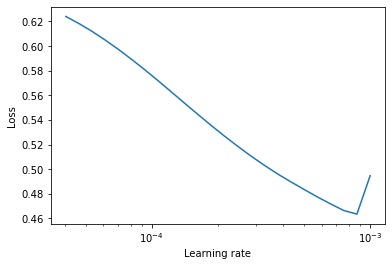

In [20]:
learner.lr_find(start_lr=1e-5,optimizer_type='adamw')

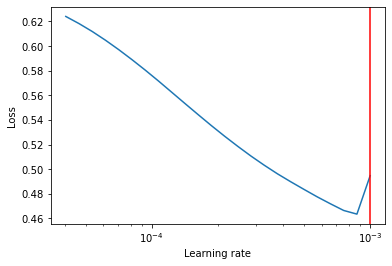

<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>

In [21]:
learner.plot(show_lr=1e-3)

In [22]:
learner.fit(epochs=6,
            lr=1e-3,
            validate=True, # Evaluate the model after each epoch
            schedule_type="warmup_cosine",
            optimizer_type="adamw")

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:247: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(16284, 0.358454712702488)

In [23]:
learner.save_model()

In [24]:
texts = ["Lol! But I love your last name though. XD", 
         "A surprise turn of events! I'm so glad you heard such great things about yourself!"]
predictions = learner.predict_batch(texts)